In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="API")
project = rf.workspace("cars-fjcrk").project("cars-detecting-and-how-many")
version = project.version(1)
dataset = version.download("yolov11")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 2.7 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Cars-detecting-and-how-many-1 in yolov11:: 100%|██████████| 19868/19868 [00:02<00:00, 8549.23it/s] 


In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.8/898.8 kB 17.3 MB/s eta 0:00:00a 0:00:01


In [4]:
!yolo task=detect mode=train data=/kaggle/input/cardet-data/data.yaml model=yolov8n.pt epochs=70 batch=16 imgsz=640 lr0=0.001 optimizer=SGD \
workers=8 augment=True patience=10 device=0

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
100%|██████████████████████████████████████| 6.25M/6.25M [00:00<00:00, 84.0MB/s]
Ultralytics 8.3.48 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/input/cardet-data/data.yaml, epochs=70, time=None, patience=10, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=Tr

In [5]:
!yolo task=detect mode=val model=/kaggle/working/runs/detect/train/weights/best.pt data=/kaggle/input/cardet-data/data.yaml

Ultralytics 8.3.48 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /kaggle/working/Cars-detecting-and-how-many-1/valid/labels.cache..
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        175        210      0.999      0.995      0.995      0.983
Speed: 2.2ms preprocess, 4.4ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [6]:
!yolo task=detect mode=predict model=/kaggle/working/runs/detect/train/weights/best.pt source=/kaggle/working/Cars-detecting-and-how-many-1/test/images

Ultralytics 8.3.48 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs

image 1/105 /kaggle/working/Cars-detecting-and-how-many-1/test/images/-0378D390-5AE2-4D09-84BB-387E850F5E5A-png_jpg.rf.1068dad0ae9363c9ab8d5b09c6e298f4.jpg: 640x640 1 car, 7.3ms
image 2/105 /kaggle/working/Cars-detecting-and-how-many-1/test/images/-0378D390-5AE2-4D09-84BB-387E850F5E5A-png_jpg.rf.d519b70a7c4da1bb3a0b5a0eac1c4e6f.jpg: 640x640 1 car, 7.5ms
image 3/105 /kaggle/working/Cars-detecting-and-how-many-1/test/images/-1058CFB8-55AA-4270-937C-FAB55C49F17A-png_jpg.rf.56ebf65002f4794fde959572eed62bbc.jpg: 640x640 1 car, 7.4ms
image 4/105 /kaggle/working/Cars-detecting-and-how-many-1/test/images/-1121F9BD-6C24-47D6-937E-DC2AB1906098-png_jpg.rf.d5dcbf37621bc9547916a3c59a6a194f.jpg: 640x640 1 car, 7.3ms
image 5/105 /kaggle/working/Cars-detecting-and-how-many-1/test/images/-11F0AF93-D3D0-4415-A4A0-B3430EA0886B-png_jpg.rf.0d2cee2a474

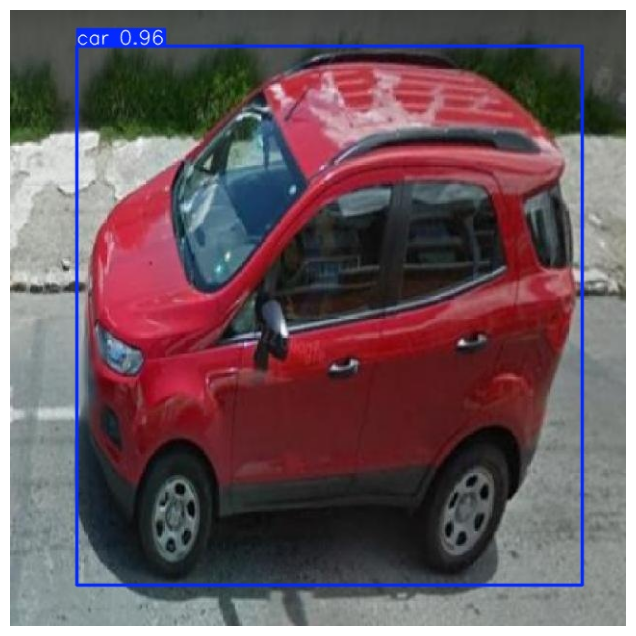

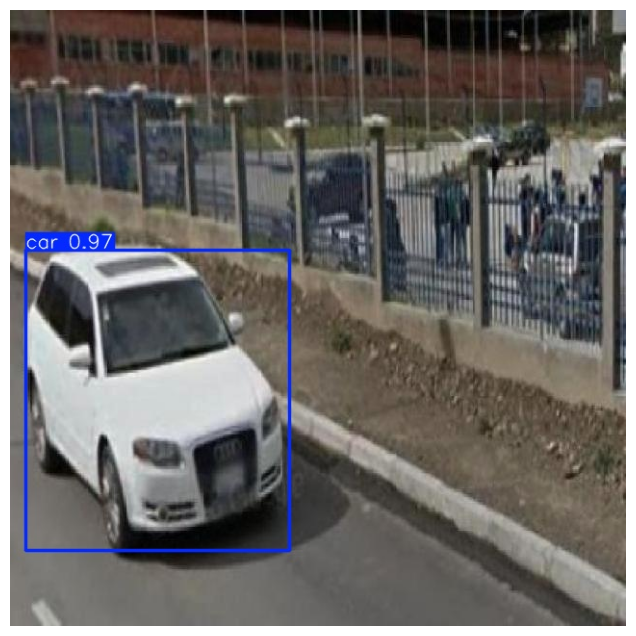

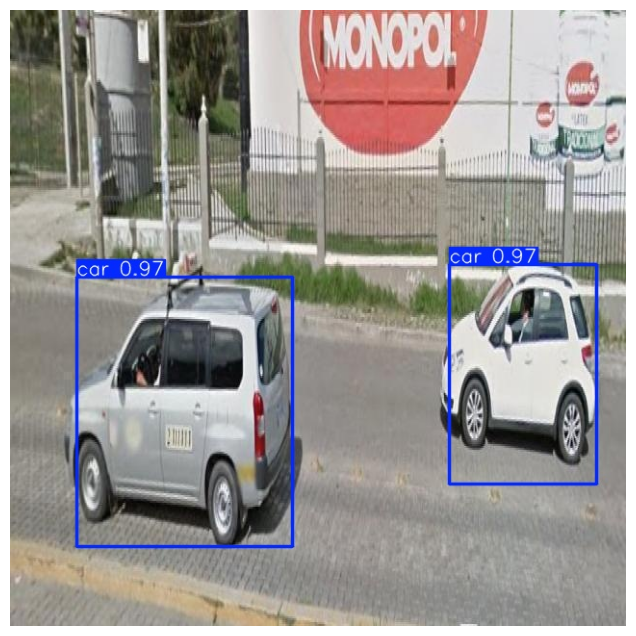

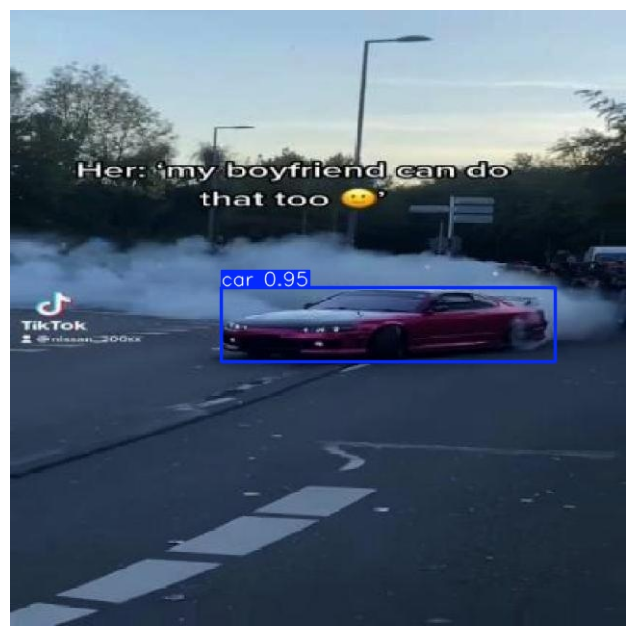

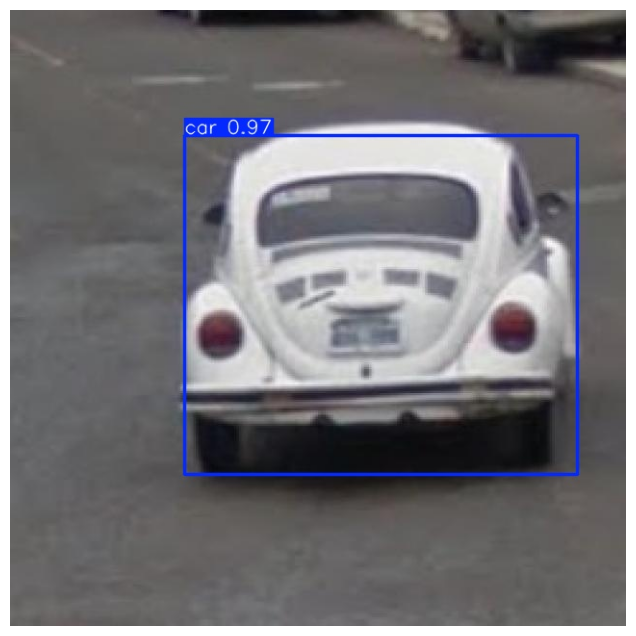

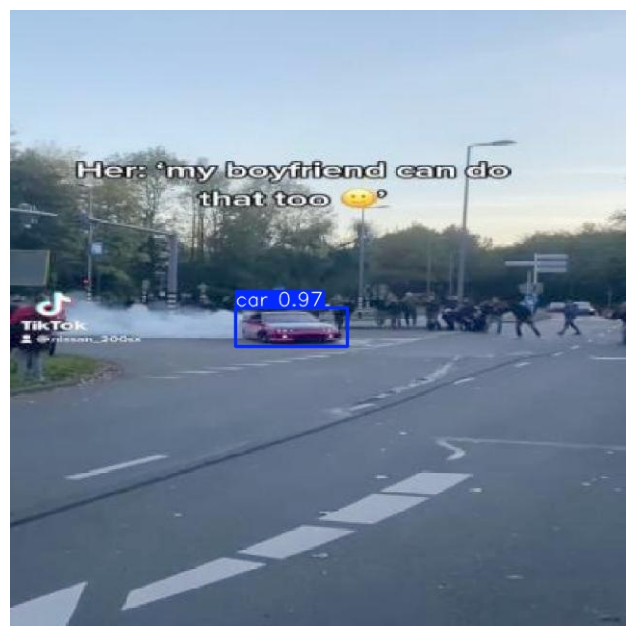

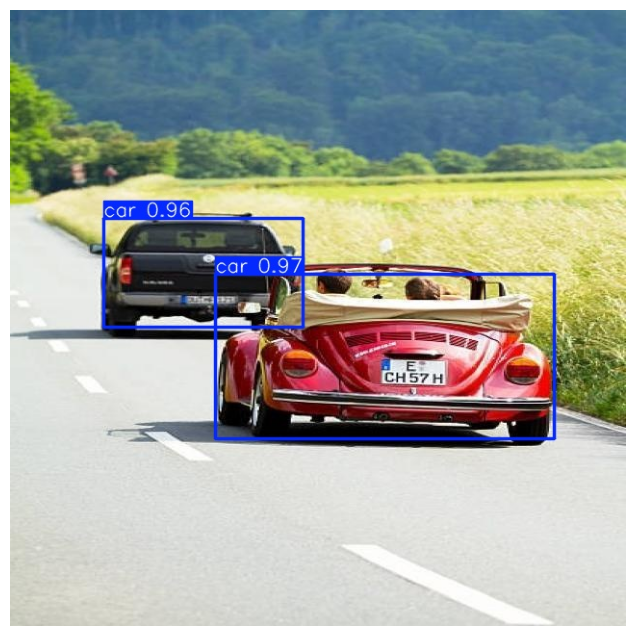

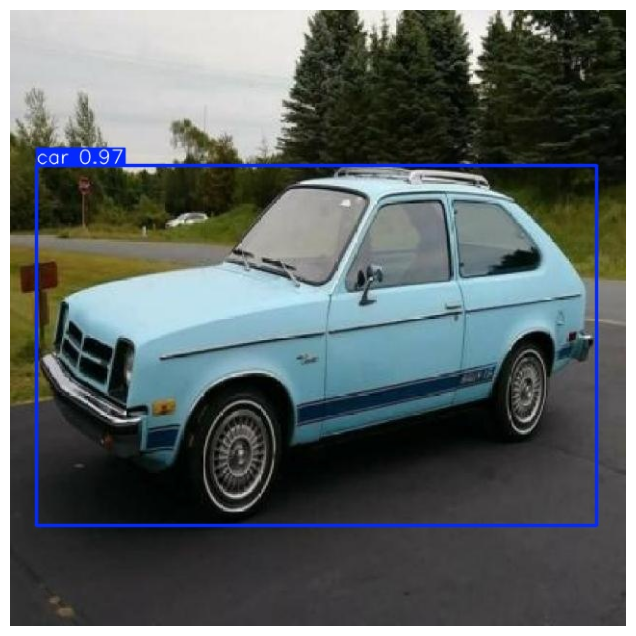

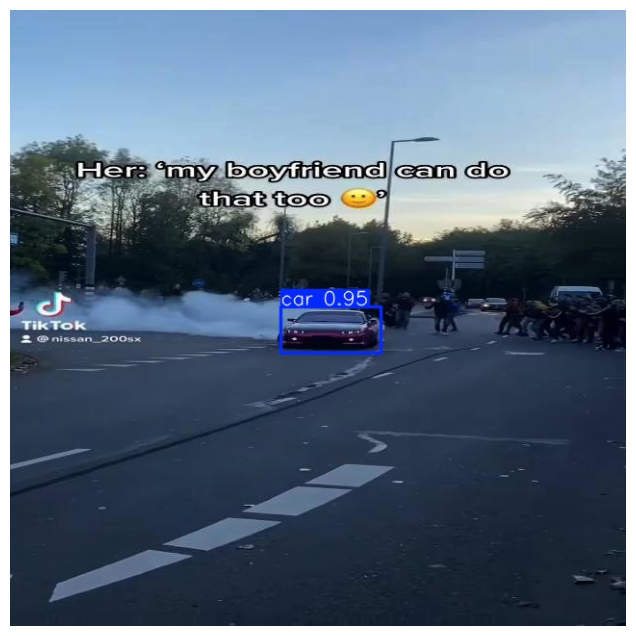

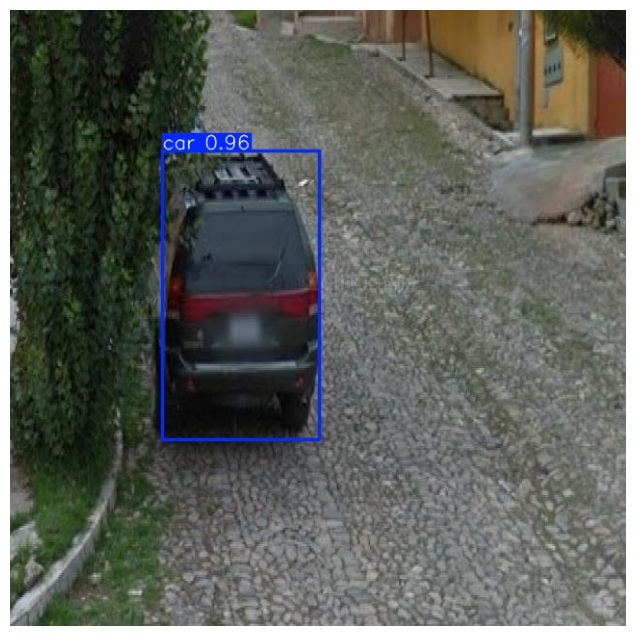

In [7]:
import cv2
import matplotlib.pyplot as plt
import glob

# Load predicted images
predicted_images = glob.glob('runs/detect/predict/*.jpg')

# Plot first 5 images
for img_path in predicted_images[:10]:
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for display
    plt.figure(figsize=(8, 8))
    plt.imshow(img)
    plt.axis('off')
    plt.show()